# Dataset overview

In [1]:
%matplotlib inline
import pylab as plt
import seaborn as sns
import pandas as pd
df = pd.read_csv('train.csv')

In [2]:
df.describe(include='all')

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
count,878049,878049,878049,878049,878049,878049,878049,878049.000000,878049.000000
unique,389257,39,879,7,10,17,23228,NaN,NaN
top,2011-01-01 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Friday,SOUTHERN,NONE,800 Block of BRYANT ST,NaN,NaN
freq,185,174900,60022,133734,157182,526790,26533,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-122.422616,37.771020
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.030354,0.456893
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-122.513642,37.707879
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-122.432952,37.752427
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-122.416420,37.775421
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-122.406959,37.784369


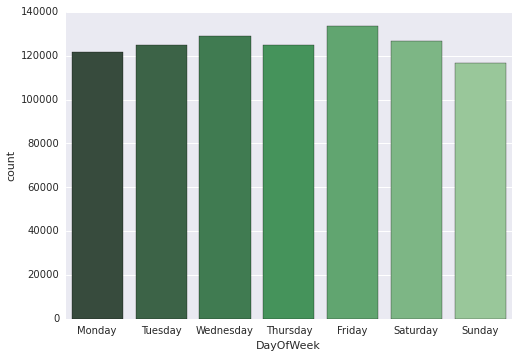

In [3]:
week = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
categories = ['ARSON','ASSAULT','BAD CHECKS','BRIBERY','BURGLARY','DISORDERLY CONDUCT',
              'DRIVING UNDER THE INFLUENCE','DRUG/NARCOTIC','DRUNKENNESS','EMBEZZLEMENT',
              'EXTORTION','FAMILY OFFENSES','FORGERY/COUNTERFEITING','FRAUD','GAMBLING',
              'KIDNAPPING','LARCENY/THEFT','LIQUOR LAWS','LOITERING','MISSING PERSON',
              'NON-CRIMINAL','OTHER OFFENSES','PORNOGRAPHY/OBSCENE MAT','PROSTITUTION',
              'RECOVERED VEHICLE','ROBBERY','RUNAWAY','SECONDARY CODES','SEX OFFENSES FORCIBLE',
              'SEX OFFENSES NON FORCIBLE','STOLEN PROPERTY','SUICIDE','SUSPICIOUS OCC','TREA',
              'TRESPASS','VANDALISM','VEHICLE THEFT','WARRANTS','WEAPON LAWS']
sns.countplot(x="DayOfWeek", data=df, palette="Greens_d", order=week)

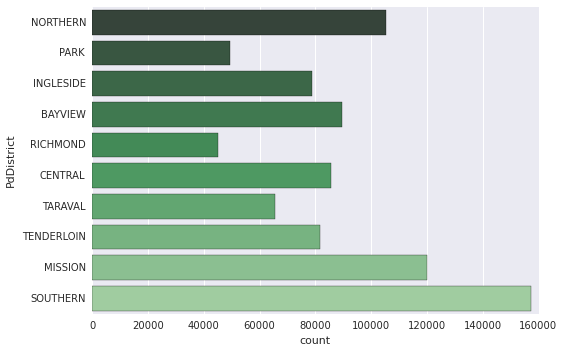

In [4]:
sns.countplot(y="PdDistrict", data=df, palette="Greens_d")

In [5]:
df.Category.value_counts()

LARCENY/THEFT                  174900
OTHER OFFENSES                 126182
NON-CRIMINAL                    92304
ASSAULT                         76876
DRUG/NARCOTIC                   53971
VEHICLE THEFT                   53781
VANDALISM                       44725
WARRANTS                        42214
BURGLARY                        36755
SUSPICIOUS OCC                  31414
MISSING PERSON                  25989
ROBBERY                         23000
FRAUD                           16679
FORGERY/COUNTERFEITING          10609
SECONDARY CODES                  9985
WEAPON LAWS                      8555
PROSTITUTION                     7484
TRESPASS                         7326
STOLEN PROPERTY                  4540
SEX OFFENSES FORCIBLE            4388
DISORDERLY CONDUCT               4320
DRUNKENNESS                      4280
RECOVERED VEHICLE                3138
KIDNAPPING                       2341
DRIVING UNDER THE INFLUENCE      2268
RUNAWAY                          1946
LIQUOR LAWS 

There are some outliers which take over 80 on thier Y value. (This means they are on North Pole!)

## Label Encoding

In [6]:
df['DayOfWeek'] = [week.index(i) for i in df['DayOfWeek'].values]
df['Category'] = [categories.index(i) for i in df['Category'].values]

from sklearn.preprocessing import LabelEncoder
df['Address'] = LabelEncoder().fit_transform(df['Address'])

## Plotting X and Y

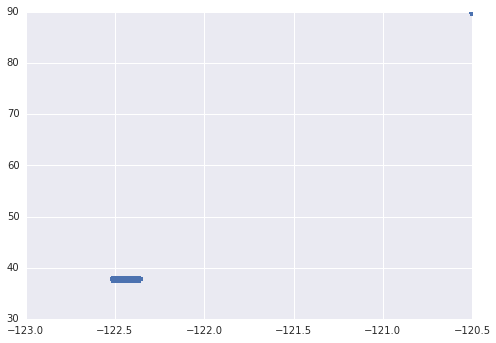

In [7]:
plt.plot(df['X'], df['Y'], 'o')

Plotting X, Y after removing outliers.

/home/tushuhei/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


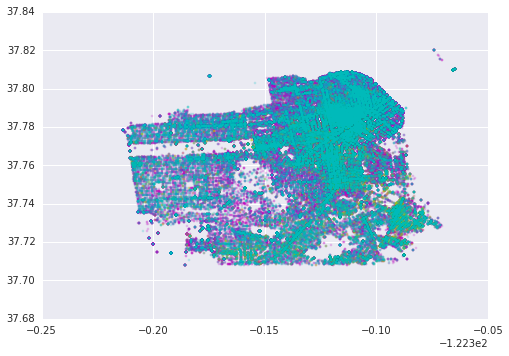

In [8]:
cats = ['LARCENY/THEFT', 'DRUG/NARCOTIC', 'NON-CRIMINAL']
colors = ['m', 'y', 'c']
for cat, color in zip(cats, colors):
    plt.scatter(df['X'][df.Y  < 40][df.Category==categories.index(cat)],
         df['Y'][df.Y  < 40][df.Category==categories.index(cat)], marker='.', alpha=0.2, color=color)

In [9]:
from datetime import datetime
datetimes = [datetime.strptime(x, '%Y-%m-%d %H:%M:%S') for x in df['Dates'].values]
df['Year'] = [d.year for d in datetimes]
df['Month'] = [d.month for d in datetimes]
df['YearMonth'] = ['%d%02d' % (d.year, d.month) for d in datetimes]

<IPython.core.display.Javascript object>


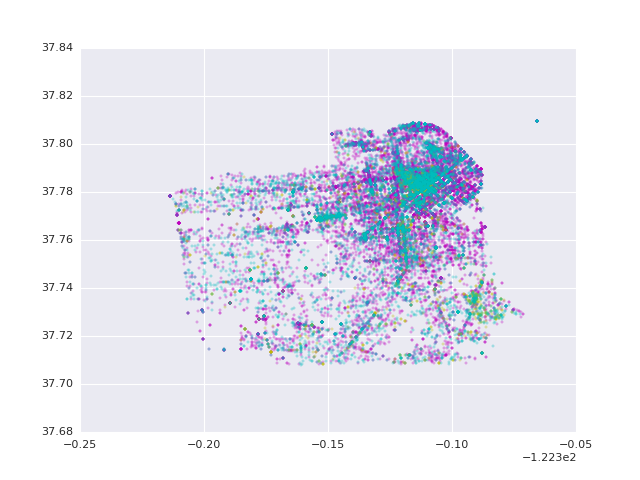

In [31]:
%matplotlib nbagg
import matplotlib.animation as animation
ims = []
fig = plt.figure()
for year in sorted(list(set(df['Year'].values))):
    im0 = plt.scatter(df['X'][df.Y  < 40][df.Category==categories.index('LARCENY/THEFT')][df.Year==year],
             df['Y'][df.Y  < 40][df.Category==categories.index('LARCENY/THEFT')][df.Year==year],
             marker='.', alpha=0.3, color='m')
    im1 = plt.scatter(df['X'][df.Y  < 40][df.Category==categories.index('DRUG/NARCOTIC')][df.Year==year],
             df['Y'][df.Y  < 40][df.Category==categories.index('DRUG/NARCOTIC')][df.Year==year],
             marker='.', alpha=0.3, color='y')
    im2 = plt.scatter(df['X'][df.Y  < 40][df.Category==categories.index('NON-CRIMINAL')][df.Year==year],
             df['Y'][df.Y  < 40][df.Category==categories.index('NON-CRIMINAL')][df.Year==year],
             marker='.', alpha=0.3, color='c')
    ims.append([im0, im1, im2])
ani = animation.ArtistAnimation(fig, ims)
plt.show()

# K-nearest neighborhood

K-nearest neighborhood algorithm with K=10 configuration.

In [11]:
from sklearn import neighbors
knn = neighbors.KNeighborsClassifier(n_neighbors=10)
print(knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=10, p=2, weights='uniform')


Cross Validation with 5 folds. -> 22.6 accuracy

In [12]:
from sklearn import cross_validation
variables = ['DayOfWeek', 'X', 'Y']
scores = cross_validation.cross_val_score(knn, df[variables], df['Category'], cv=5)
print(scores.mean(), scores)

0.226037425333 [ 0.22549181  0.22669734  0.2283513   0.23036491  0.21928176]


# Decision Tree

In [13]:
from sklearn import tree
dt = tree.DecisionTreeClassifier()
scores = cross_validation.cross_val_score(dt, df[variables], df['Category'], cv=5)
print(scores.mean(), scores)

0.23514290953 [ 0.23147616  0.23386651  0.2417844   0.23912325  0.22946422]


# Random Forest

In [14]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier()
scores = cross_validation.cross_val_score(dt, df[variables], df['Category'], cv=5)
print(scores.mean(), scores)

0.235205554155 [ 0.23127117  0.23396901  0.24190968  0.23932257  0.22955534]
